In [17]:
%alias package {__import__('sys').executable} -m pip install --quiet --upgrade %l

In [18]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [19]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

In [20]:
%package numpy pandas 

import numpy as np
import pandas as pd
'''
%package swifter
import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=False
)
'''

%package scikit-learn
import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
#import sklearn.svm

#%package scikit-learn-intelex
#import sklearnex
#sklearnex.patch_sklearn()

#%package xgboost
#import xgboost

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs0000000000046eea00002e3a'

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.22.4 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.


In [21]:
%package tensorflow

import tensorflow as tf
from tensorflow import keras as keras

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires absl-py~=0.10, but you have absl-py 1.3.0 which is incompatible.
tensorflow-gpu 2.6.0 requires flatbuffers~=1.12.0, but you have flatbuffers 22.11.23 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.22.4 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.


2022-12-01 20:40:26.944944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 20:40:27.622222: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-01 20:40:27.622264: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 20:40:29.454200: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7:

In [22]:
%package spacy spacy-transformers

import spacy
import spacy_transformers
spacy.prefer_gpu()

spacy.cli.download('en_core_web_lg', False, False, '--quiet')

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


2022-12-01 20:41:42.656444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-01 20:41:42.656893: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-01 20:41:42.657269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-01 20:41:42.657605: W tensorflow/compiler/xla/stream_executor/platform/default/ds

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [23]:
%package scikeras

import scikeras as skeras
import scikeras.wrappers

In [74]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

plt.style.use('default')

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

## Dataset

In [24]:
# TODO
df_scripts = pd.read_pickle('./dataset.pkl', compression='gzip')

In [25]:
df_scripts

,script_name,script_text
0,No Country for Old Men Script,[\r\n\r\n\r\n \r\n NO...
1,Strangers on a Train Script,[ STRANGERS ON A TRAIN\r\n\r...
2,"Sex, Lies and Videotape Script",[\r\n\r\n<b><!--\r\n</b>if (window!= top)\r\nt...
3,Absolute Power Script,[ABSOLUTE POWER\r\n\r\n Written by\r\n ...
4,"World is not Enough, The Script",[\t\t\r\n\r\n T H E W O R L D I S ...
...,...,...
1204,Shivers Script,[\r\n\r\n\r\n ...
1205,American Psycho Script,[\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\...
1206,Five Easy Pieces Script,[\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\...
1207,Saving Mr. Banks Script,[\r\n\r\n\r\n ...


In [26]:
df_scripts = df_scripts.astype({
    'script_name': 'category'
})

In [27]:
df_scripts = df_scripts.explode('script_text', ignore_index=True)

In [28]:
df_scripts.dropna(inplace=True)
df_scripts.reset_index(drop=True, inplace=True)

In [29]:
df_scripts

,script_name,script_text
0,No Country for Old Men Script,\r\n\r\n\r\n \r\n NO ...
1,Strangers on a Train Script,STRANGERS ON A TRAIN\r\n\r\...
2,"Sex, Lies and Videotape Script",\r\n\r\n<b><!--\r\n</b>if (window!= top)\r\nto...
3,Absolute Power Script,ABSOLUTE POWER\r\n\r\n Written by\r\n ...
4,"World is not Enough, The Script",\t\t\r\n\r\n T H E W O R L D I S N...
...,...,...
1172,Shivers Script,\r\n\r\n\r\n ...
1173,American Psycho Script,\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\r...
1174,Five Easy Pieces Script,\r\n\r\n\r\n<b><!--\r\n</b>if (window!= top)\r...
1175,Saving Mr. Banks Script,\r\n\r\n\r\n ...


In [30]:
#print(dataset_scripts.iloc[0]['script_text'][-1])

TODO
GOAL extract the following features from texts:

Feature engineering TODO list: 
- location: Named Entity Recognition
- character: Named Entity Recognition
    see https://keras.io/examples/nlp/ner_transformers/
    see https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
- convo: ??

sentence embedding?

## Feature Engineering

In [31]:
def str_normalize_eol(s, eol=os.linesep):
    return str.join(eol, str.splitlines(s))

In [32]:
%package joblib

import os
import re

import joblib

class ParagraphExtractor(skl.base.TransformerMixin):
    def __init__(self,
        eol=os.linesep, #'\r\n' #os.linesep
        eol_freq_min=2,
        n_jobs=1
    ):
        self.eol = eol
        self.eol_freq_min = eol_freq_min
        self.n_jobs = n_jobs

        self._pattern = re.compile(
            fr'(?:{self.eol}\s*?){{{self.eol_freq_min},}}'
        )

    def fit(self, _X, _y=None):
        return self

    def transform(self, X, _y=None):
        def _impl_single(s):
            nonlocal self
            return re.split(
                self._pattern,
                str_normalize_eol(s, eol=self.eol)
            )

        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(_impl_single)(s)
                for s in X
        )

        
df_scripts['script_paragraphs'] = ParagraphExtractor(n_jobs=-1).fit_transform(
    df_scripts['script_text']#.iloc[:100]
)

In [33]:
df_scripts_para = (
    df_scripts[['script_name', 'script_paragraphs']]
        .explode('script_paragraphs', ignore_index=True)
)

In [34]:
df_scripts_para['script_paragraphs'] = (
    df_scripts_para['script_paragraphs'].str.strip()
)

In [35]:
df_scripts_para = df_scripts_para[
    # non-empty strings
    df_scripts_para['script_paragraphs'].astype(bool)
]

In [65]:
df_scripts_para['script_name'] = (
    df_scripts_para['script_name']
        .cat.remove_unused_categories()
)

In [66]:
df_scripts_para

,script_name,script_paragraphs
1,No Country for Old Men Script,NO COUNTRY FOR OLD MEN
2,No Country for Old Men Script,Written by
3,No Country for Old Men Script,Joel Coen & Ethan Coen
4,No Country for Old Men Script,Based on the Novel by
5,No Country for Old Men Script,Cormac McCarthy
...,...,...
1999877,Get Carter Script,Carter lies on the beach. The waves lap around...
1999878,Get Carter Script,EXT. CLIFF TOP - EARLY MORNING
1999879,Get Carter Script,Kinnear's hit man coolly dismantles his rifle....
1999880,Get Carter Script,FADE OUT:


In [37]:
# TODO rm
#df_scripts['script_paragraphs'].iloc[0][:20]

In [67]:
df_n_paras = df_scripts_para.groupby('script_name').count()

In [68]:
df_n_paras[df_n_paras['script_paragraphs'] < 10]

,script_paragraphs
script_name,
Ace Ventura: Pet Detective Script,3
American Outlaws Script,1
Days of Heaven Script,2
Erik the Viking Script,3
Fletch Script,2
Four Feathers Script,8
Highlander: Endgame Script,4
Made Script,1
Never Been Kissed Script,6


In [80]:
# TODO treat these samples separately
# e.g. those without line breaks between paragraphs 
# (so only one line break after each para)

df_scripts_outliers = df_scripts_para[
    df_scripts_para['script_name'].isin(
        df_n_paras[df_n_paras['script_paragraphs'] < 10].index
    )
]
df_scripts_outliers

,script_name,script_paragraphs
370547,Four Feathers Script,"""Four Feathers"" -- by Michael Schiffer, revise..."
370548,Four Feathers Script,<b><!--\n</b>if (window!= top)\ntop.location.h...
370549,Four Feathers Script,Four Feathers\nScreenplay by Michael Schiffer\...
370550,Four Feathers Script,EXT. TRAINING GROUND/ WESTMINSTER barracks/ LO...
370551,Four Feathers Script,COLONEL SUTCH\nThrow them away. They don't mea...
370552,Four Feathers Script,- THE CHAPEL: is filled with MILITARY MEN; Fev...
370553,Four Feathers Script,CUT TO:\nEXT. CHURCH - AFTER CEREMONY ...
370554,Four Feathers Script,THE END.
407261,Training Day Script,"""Training Day"" -- by David Ayer ..."
540920,Never Been Kissed Script,"""Never Been Kissed"""


In [82]:
df_scripts_outliers.loc[370549]['script_paragraphs']

'Four Feathers\nScreenplay by Michael Schiffer\nrevised by Hossein Amini\nbased on the book by A.E. Mason'

In [87]:
# TODO lxml to parse html
print(df_scripts[df_scripts['script_name'] == 'They Script'].iloc[0]['script_text'][:10000])



THEY




@font-face {
	font-family: Courier;
<b>}
</b>@font-face {
	font-family: Comic Sans MS;
<b>}
</b>@page  {mso-page-border-surround-header: no; mso-page-border-surround-footer: no; }
@page Section1 {size: 8.5in 11.0in; margin: 1.0in 0in 1.0in 0in; mso-header-margin: .5in; mso-footer-margin: .5in; mso-paper-source: 0; }
P.MsoNormal {
	FONT-SIZE: 12pt; MARGIN: 0in 0in 0pt; FONT-FAMILY: "Comic Sans MS"; mso-style-parent: ""; mso-pagination: none; mso-layout-grid-align: none; mso-fareast-font-family: "Times New Roman"; mso-bidi-font-family: "Times New Roman"
<b>}
</b>LI.MsoNormal {
	FONT-SIZE: 12pt; MARGIN: 0in 0in 0pt; FONT-FAMILY: "Comic Sans MS"; mso-style-parent: ""; mso-pagination: none; mso-layout-grid-align: none; mso-fareast-font-family: "Times New Roman"; mso-bidi-font-family: "Times New Roman"
<b>}
</b>DIV.MsoNormal {
	FONT-SIZE: 12pt; MARGIN: 0in 0in 0pt; FONT-FAMILY: "Comic Sans MS"; mso-style-parent: ""; mso-pagination: none; mso-layout-grid-align: none; mso-fareast-fo

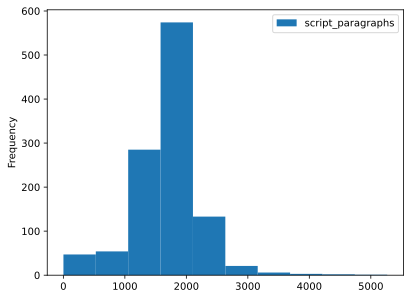

In [75]:
_ = df_n_paras.plot.hist()

## Models

### Neural Network (LSTM RNN)

#### Text Transformers

In [38]:
class KerasTextVectorizer(skl.base.TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.base = keras.layers.TextVectorization(
            *args, **kwargs
        )

    def fit(self, X, _y=None):
        self.base.adapt(X)
        return self

    def transform(self, X, _y=None):
        return self.base(X)

In [39]:
class SpacyTextVectorizer(KerasTextVectorizer):
    def __init__(self, *args, **kwargs):
        nlp = spacy.load('en_core_web_lg')
        super().__init__(
            *args, 
            vocabulary=list(nlp.vocab.strings),
            **kwargs
        )

    def fit(self, _X, _y=None):
        return self

#### Classifier

In [40]:
def KerasTextClassifier(*args, **kwargs):
    class _class(skeras.wrappers.KerasClassifier):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)

            self.n_features_in_ = None
            self._user_target_encoder = (
                skl.preprocessing.OneHotEncoder(
                    sparse=False
                )
            )

        @property
        def target_encoder(self):
            return self._user_target_encoder

    _inst = None

    def _build_model(optimizer='adam'):
        nonlocal _inst

        n_features = _inst.n_features_in_
        n_classes = np.size(_inst._user_target_encoder.categories_)

        input_dim = n_features
        output_dim = n_classes

        # https://www.tensorflow.org/tutorials/keras/text_classification
        model = keras.Sequential([
            keras.layers.Embedding(
                input_dim=input_dim,
                output_dim=128,
                mask_zero=True
            ),

            keras.layers.Conv1D(
                filters=32, kernel_size=3, 
                padding='same', 
                activation='relu'
            ),
            keras.layers.MaxPooling1D(pool_size=10),
            keras.layers.Dropout(.1),

            keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(64)),

            keras.layers.Dense(128, activation='relu'),

            keras.layers.Dense(
                output_dim,
                activation='softmax'
            )
        ])

        model.compile(
            loss='categorical_crossentropy', 
            optimizer=optimizer, 
            metrics=['accuracy']
        )

        return model

    _inst = _class(
        _build_model, 
        *args, **kwargs
    )
    return _inst

#### Predictor (Vocab From Spacy)

In [51]:
def _model_nn_spacy(X, y):
    encoder = SpacyTextVectorizer(
        max_tokens=None,
        standardize='lower_and_strip_punctuation',
        split='whitespace',
        #ngrams=(1, 2),
        output_mode='int', # TODO tf_idf
        #sparse=True,
    )

    X = encoder.fit_transform(X)

    clf = KerasTextClassifier(
        callbacks=[
            #keras.callbacks.EarlyStopping(
            #    monitor='loss', 
            #    patience=3, 
            #    min_delta=0.0001
            #),
            #keras.callbacks.LambdaCallback(
            #    on_train_end=lambda logs: print(logs)
            #)
        ]
    )
    clf.initialize(X, y)
    
    model = skl.model_selection.GridSearchCV(
        clf,
        param_grid={
            'epochs': [5],
            'batch_size': [1024]
        },
        cv=skl.model_selection.RepeatedStratifiedKFold(
            n_splits=3, n_repeats=1
        ),
        #cv=skl.model_selection.KFold(
        #    n_splits=5, shuffle=True
        #),
        #n_jobs=-1,
        verbose=3
    )

    model.fit(X, y)

    return model

In [73]:
# TODO
df_scripts_para_ = df_scripts_para.sample(5000)
model_nn_spacy = _model_nn_spacy(
    X=df_scripts_para_['script_paragraphs'],
    y=df_scripts_para_[['script_name']]
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Epoch 1/5


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 931, in _fit
    self._fit_keras_model(
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 526, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/j8aguirr/

[CV 1/3] END ...........batch_size=1024, epochs=5;, score=nan total time=   2.6s
Epoch 1/5


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 931, in _fit
    self._fit_keras_model(
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 526, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/j8aguirr/

[CV 2/3] END ...........batch_size=1024, epochs=5;, score=nan total time=   2.7s
Epoch 1/5


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 931, in _fit
    self._fit_keras_model(
  File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 526, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/home/j8aguirr/

[CV 3/3] END ...........batch_size=1024, epochs=5;, score=nan total time=   2.6s
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_19/embedding_19/embedding_lookup' defined at (most recent call last):
    File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 667, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 445, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_131/4093806015.py", line 3, in <module>
      model_nn_spacy = _model_nn_spacy(
    File "/tmp/ipykernel_131/3750317810.py", line 43, in _model_nn_spacy
      model.fit(X, y)
    File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
      return f(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 880, in fit
      self.best_estimator_.fit(X, y, **fit_params)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
      super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
      self._fit(
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 931, in _fit
      self._fit_keras_model(
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/scikeras/wrappers.py", line 526, in _fit_keras_model
      hist = self.model_.fit(x=X, y=y, **fit_args)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/j8aguirr/.local/lib/python3.9/site-packages/keras/layers/core/embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_19/embedding_19/embedding_lookup'
indices[257,0] = 595346 is not in [0, 258)
	 [[{{node sequential_19/embedding_19/embedding_lookup}}]] [Op:__inference_train_function_103995]

In [43]:
# TODO histogram
df_scripts['script_paragraphs'].apply(len) < 10

0       False
1       False
2       False
3       False
4       False
        ...  
1172    False
1173    False
1174    False
1175    False
1176    False
Name: script_paragraphs, Length: 1177, dtype: bool

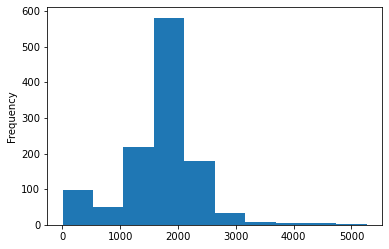

In [50]:
_ = df_scripts['script_paragraphs'].apply(len).plot.hist()

In [48]:
df_scripts[df_scripts['script_paragraphs'].apply(len) < 2]

,script_name,script_text,script_paragraphs
25,"Officer and a Gentleman, An Script",,[]
92,Commando Script,,[]
101,Speed Script,,[]
111,Frankenstein Script,,[]
125,Equilibrium Script,,[]
140,Conan the Barbarian Script,,[]
227,Training Day Script,"""Training Day"" -- by David Ayer ...","[ ""Training Day"" -- by David Ayer ..."
238,Superfights Script,,[]
245,25th Hour Script,,[]
252,Jade Script,,[]


In [45]:
#df_scripts.iloc[558]['script_paragraphs']

In [46]:
df_scripts['script_paragraphs'].apply(len).iloc[1175]

1759

In [47]:
len(df_scripts['script_paragraphs'].iloc[1175])

1759